# SI 385 - Final Project Question 4
## Group 1: Dhara Patel, Felicia Chen, Priya Shah, Molly Adler

## Question 4: Can we predict blood pressure based on the patient’s medical data?  

## Data Link
- https://www.kaggle.com/datasets/abdallaahmed77/healthcare-risk-factors-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Load Dataset


In [3]:
healthcare_data = pd.read_csv('../data/healthcarerisk_data.csv')

## Exploratory Data Analysis (EDA)

In [4]:
healthcare_data.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [5]:
print(healthcare_data.shape)
print("Rows:", healthcare_data.shape[0])
print("Columns:", healthcare_data.shape[1])

(30000, 20)
Rows: 30000
Columns: 20


In [6]:
healthcare_data.describe(include = 'all')

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
count,25500.000000,25500,25500,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000.000000
unique,NaN,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,Female,Hypertension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,###,NaN
freq,NaN,12865,7120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7575,NaN
mean,54.616784,NaN,NaN,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,NaN,-0.517010
std,15.973618,NaN,NaN,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,NaN,100.076959
min,10.000000,NaN,NaN,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,NaN,-412.169596
25%,45.000000,NaN,NaN,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,NaN,-68.270749
50%,55.000000,NaN,NaN,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,NaN,-0.510742
75%,66.000000,NaN,NaN,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,NaN,66.811399


In [7]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

## Accounting for Null Values

In [8]:
healthcare_data.isnull().sum()

Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
random_notes            0
noise_col               0
dtype: int64

In [9]:
healthcare_data['Blood Pressure'] = (
    healthcare_data['Blood Pressure'].fillna(
        healthcare_data['Blood Pressure'].median()
    )
)

healthcare_data['Age'] = healthcare_data['Age'].fillna(
    healthcare_data['Age'].median()
)

healthcare_data['Glucose'] = healthcare_data['Glucose'].fillna(
    healthcare_data['Glucose'].median()
)

healthcare_data['Gender'] = healthcare_data['Gender'].fillna('Unknown')
healthcare_data['Medical Condition'] = healthcare_data['Medical Condition'].fillna('Unknown')

In [10]:
healthcare_data = healthcare_data.drop(columns=['random_notes', 'noise_col'])

In [11]:
healthcare_data.isnull().sum()

Age                  0
Gender               0
Medical Condition    0
Glucose              0
Blood Pressure       0
BMI                  0
Oxygen Saturation    0
LengthOfStay         0
Cholesterol          0
Triglycerides        0
HbA1c                0
Smoking              0
Alcohol              0
Physical Activity    0
Diet Score           0
Family History       0
Stress Level         0
Sleep Hours          0
dtype: int64

## Cramer's V Test 

In [13]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))



In [14]:
categorical_vars = ['Gender', 'Medical Condition', 'Smoking', 'Alcohol', 'Family History']

cramers_dict = {}

bins = [0, 120, 130, 140, np.inf]
labels = ['Normal', 'Elevated', 'Stage 1', 'Stage 2']

healthcare_data['BP_category'] = pd.cut(
    healthcare_data['Blood Pressure'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

for col in categorical_vars:
    cramers_dict[col] = cramers_v(healthcare_data['BP_category'], healthcare_data[col])

cramers_sorted = dict(sorted(cramers_dict.items(), key=lambda item: item[1], reverse=True))
print(cramers_sorted)


{'Medical Condition': np.float64(0.2996924952644989), 'Family History': np.float64(0.11646179713958946), 'Smoking': np.float64(0.09060022057691569), 'Alcohol': np.float64(0.05515253541209637), 'Gender': np.float64(0.010210833441614133)}


In [15]:
categorical_vars = ['Gender', 'Medical Condition', 'Smoking', 'Alcohol', 'Family History']

for col in categorical_vars:
    v = cramers_v(healthcare_data['BP_category'], healthcare_data[col])
    print(f"Cramer's V (BP vs {col}): {v:.3f}")

Cramer's V (BP vs Gender): 0.010
Cramer's V (BP vs Medical Condition): 0.300
Cramer's V (BP vs Smoking): 0.091
Cramer's V (BP vs Alcohol): 0.055
Cramer's V (BP vs Family History): 0.116


In [ ]:
top_vars = list(cramers_sorted.keys())[:2]  
print("Top variables to include in pair plot:", top_vars)

Top variables to include in pair plot: ['Medical Condition', 'Family History']


## Visualizations

In [17]:
df_plot = healthcare_data[['Blood Pressure'] + top_vars].copy()
for col in top_vars:
    df_plot[col] = pd.Categorical(df_plot[col]).codes

### Pair Plot


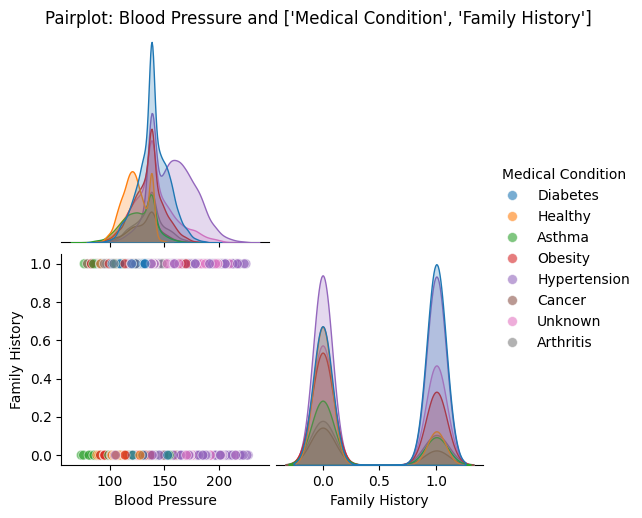

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = healthcare_data[['Blood Pressure'] + top_vars].copy()


sns.pairplot(df_plot, hue=top_vars[0], corner=True, 
             plot_kws={'alpha':0.6, 's':50},  
             diag_kind='kde')  
plt.suptitle(f'Pairplot: Blood Pressure and {top_vars}', y=1.02)
plt.show()




### Violin Plots

/var/folders/lv/vj_w1myn5gl836_yxqy_j24r0000gn/T/ipykernel_8324/2352475760.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='Blood Pressure', data=healthcare_data, palette="pastel", ax=ax)
/var/folders/lv/vj_w1myn5gl836_yxqy_j24r0000gn/T/ipykernel_8324/2352475760.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='Blood Pressure', data=healthcare_data, palette="pastel", ax=ax)


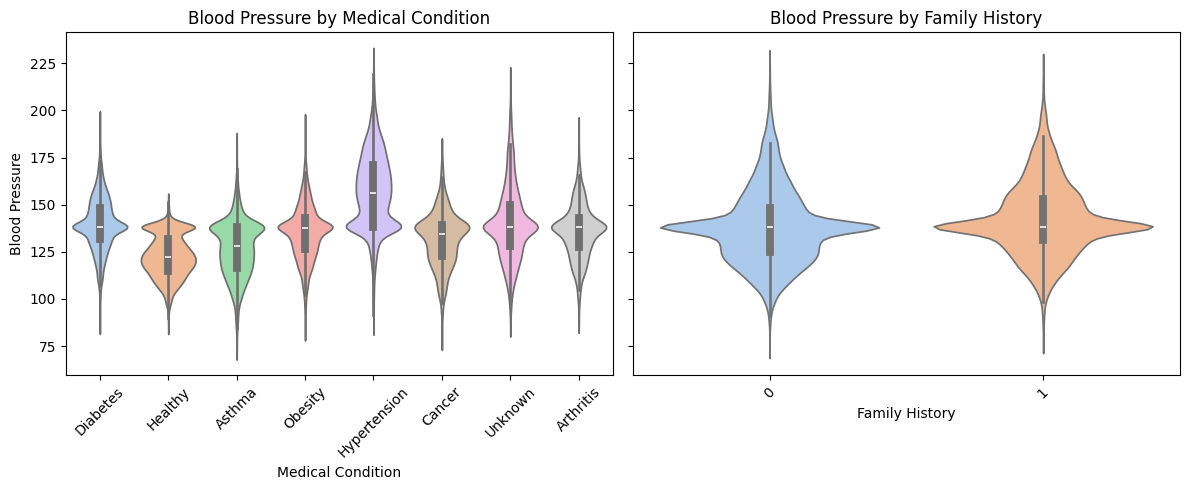

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

top_vars = list(cramers_sorted.keys())[:2]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, col in zip(axes, top_vars):
    sns.violinplot(x=col, y='Blood Pressure', data=healthcare_data, palette="pastel", ax=ax)
    ax.set_title(f'Blood Pressure by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Blood Pressure')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()





### Box Plots

/var/folders/lv/vj_w1myn5gl836_yxqy_j24r0000gn/T/ipykernel_8324/4049380455.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Blood Pressure', data=healthcare_data, palette="pastel", ax=ax)
/var/folders/lv/vj_w1myn5gl836_yxqy_j24r0000gn/T/ipykernel_8324/4049380455.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Blood Pressure', data=healthcare_data, palette="pastel", ax=ax)


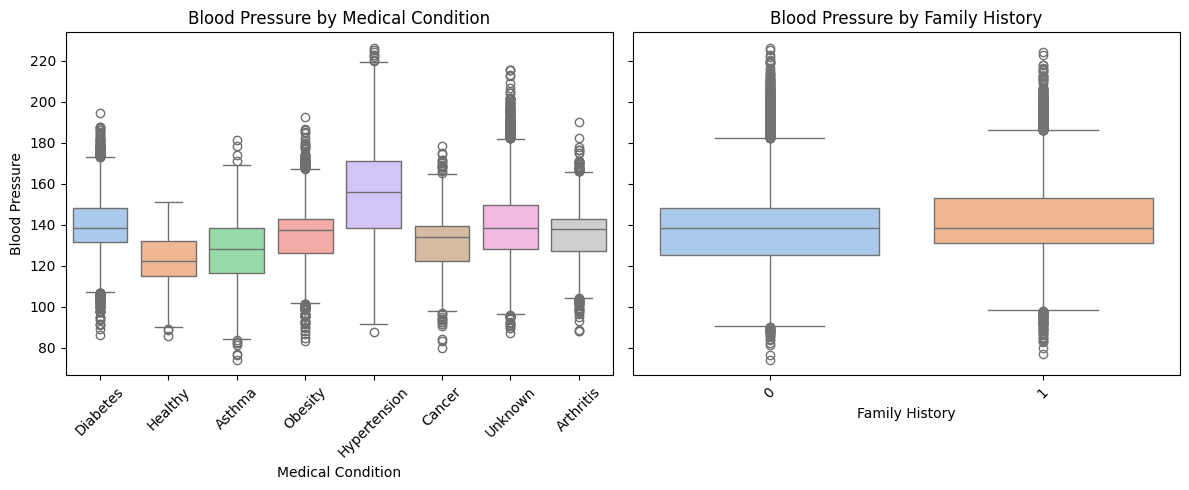

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


top_vars = list(cramers_sorted.keys())[:2]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, col in zip(axes, top_vars):
    sns.boxplot(x=col, y='Blood Pressure', data=healthcare_data, palette="pastel", ax=ax)
    ax.set_title(f'Blood Pressure by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Blood Pressure')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Heatmap

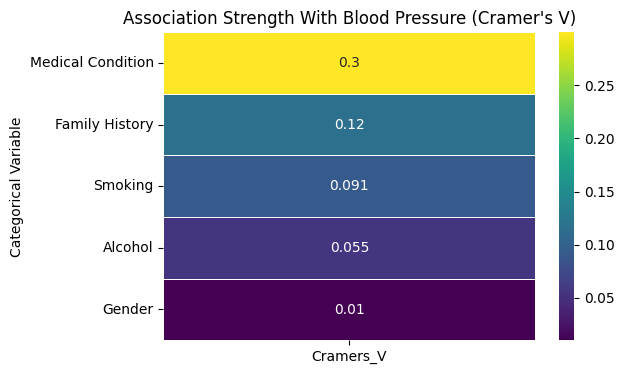

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


cv_df = pd.DataFrame.from_dict(cramers_sorted, orient='index', columns=['Cramers_V'])

plt.figure(figsize=(6, 4))
sns.heatmap(cv_df, annot=True, cmap='viridis', linewidths=.5, cbar=True)
plt.title("Association Strength With Blood Pressure (Cramer's V)")
plt.ylabel("Categorical Variable")
plt.show()


# End of Notebook